In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 수집을 위한 라이브러리
import yfinance as yf

# 머신 러닝 및 딥러닝 라이브러리
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (예: 나눔고딕)
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows 환경에서 '맑은 고딕' 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 종목코드 리스트 정의
tickers = [
    "003570.ks", "005830.ks", "175330.ks", "000810.ks", "005010.ks",
    "018670.ks", "015360.ks", "000270.ks", "001450.ks", "316140.ks",
    "017940.ks", "036460.ks", "086790.ks", "082640.ks", "024110.ks",
    "105560.ks", "003120.ks", "002960.ks", "003690.ks", "001720.ks",
    "029780.ks", "055550.ks", "030200.ks", "138930.ks", "100250.ks",
    "306200.ks", "267250.ks", "033780.ks", "078520.ks", "001270.ks",
    "032830.ks", "005940.ks", "001120.ks"
]


# 종목코드별 회사명 가져오기
company_names = {}

for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        company_name = stock.info.get('longName', 'Unknown')
        company_names[ticker] = company_name
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# 결과 출력
print("\n종목코드별 회사명:")
for ticker, name in company_names.items():
    print(f"{ticker}: {name}")


종목코드별 회사명:
003570.ks: Snt Dynamics Co.,Ltd.
005830.ks: DB Insurance Co., Ltd.
175330.ks: JB Financial Group Co., Ltd.
000810.ks: Samsung Fire & Marine Insurance Co., Ltd.
005010.ks: Husteel Co., Ltd.
018670.ks: SK Gas Co., Ltd.
015360.ks: Yesco Holdings Co., Ltd.
000270.ks: Kia Corporation
001450.ks: Hyundai Marine & Fire Insurance Co., Ltd.
316140.ks: Woori Financial Group Inc.
017940.ks: E1 Corporation
036460.ks: Korea Gas Corporation
086790.ks: Hana Financial Group Inc.
082640.ks: Tong Yang Life Insurance Co., Ltd.
024110.ks: Industrial Bank of Korea
105560.ks: KB Financial Group Inc.
003120.ks: Ilsung Is Co., Ltd.
002960.ks: Hankook Shell Oil Co.,Ltd.
003690.ks: Korean Reinsurance Company
001720.ks: Shinyoung Securities Co., Ltd.
029780.ks: Samsung Card Co., Ltd.
055550.ks: Shinhan Financial Group Co., Ltd.
030200.ks: KT Corporation
138930.ks: BNK Financial Group Inc.
100250.ks: Chinyang Holdings Corp.
306200.ks: SeAH Steel Corporation
267250.ks: HD Hyundai Co., Ltd.
033780.ks: KT

In [14]:
# 노인들을 위한 안정적인 자산 리스트 
asset_list = [
    '005930.KS',   
    '000810.KS',  
    '005830.KS',   
    '018670.KS',  
    '000270.KS',   
    '000660.KS',   
    '036460.KS',   
    '373220.KS',  
    '105560.KS',  
    '267250.KS'   
]


In [15]:
# 시작일과 종료일 설정
start_date = '2010-01-01'
end_date = '2024-09-01'

# 가격 데이터 수집
price_data = yf.download(asset_list, start=start_date, end=end_date)['Adj Close']

# 결측치 처리
price_data = price_data.ffill()
price_data = price_data.ffill()

# 수익률 계산
returns = price_data.pct_change().dropna()


[*********************100%%**********************]  10 of 10 completed


In [16]:
# 노인 투자자의 위험 허용도 설정 (0에 가까울수록 보수적)
risk_tolerance = 0.2

In [18]:
# 자산별 통계적 특징 계산
features = pd.DataFrame()

# 평균 수익률
features['mean_return'] = returns.mean()

# 수익률 변동성
features['volatility'] = returns.std()

# 샤프 비율 (무위험 수익률은 0으로 가정)
features['sharpe_ratio'] = features['mean_return'] / features['volatility']

# 상관관계 행렬
correlation = returns.corr()


# 특징 데이터프레임에 추가
for asset in asset_list:
    if asset in correlation.columns:
        features.loc[asset, 'correlation_with_portfolio'] = correlation[asset].mean()
    else:
        print(f"{asset} is not in correlation columns.")


# 특징 정규화
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 특징과 타겟 분리
X = features_scaled
y = features['mean_return'].values


In [19]:
# 학습용 및 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# 모델 구축
model = Sequential()
model.add(Input(shape=(X.shape[1],)))  # Input 레이어 추가
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping 콜백 설정
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=4,
                    validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0288 - val_loss: 0.0185
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0125 - val_loss: 0.0072
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - val_loss: 0.0025
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - val_loss: 0.0011
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - val_loss: 0.0025
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - val_loss: 0.0018
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021 - val_loss: 9.8016e-04
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0027 - val_loss: 2.2963e-04
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0063 - val_loss: 1.4443e-04
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0030 - val_loss: 3.2260e-04
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Model - MSE: 0.0009122258917770573 MAE: 0.02664567199475685


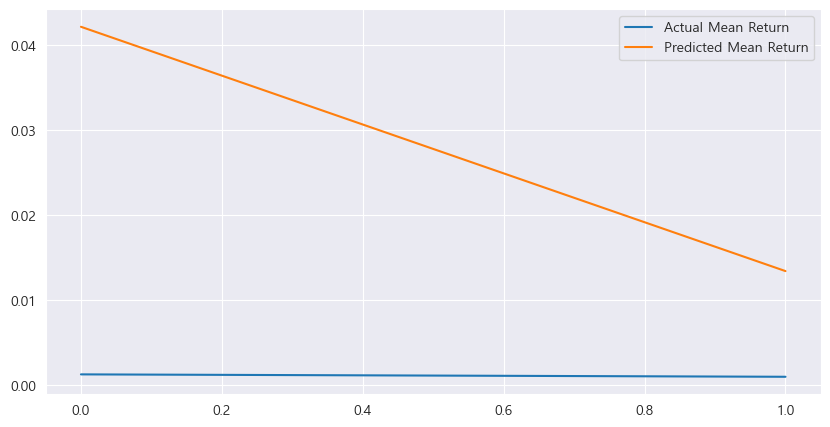

In [21]:
# 예측 수행
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Model - MSE:', mse, 'MAE:', mae)

# 실제 값과 예측 값 비교
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Mean Return')
plt.plot(y_pred, label='Predicted Mean Return')
plt.legend()
plt.show()


In [22]:
# 전체 자산에 대해 예측 수행
features_scaled_all = scaler.transform(features)
predicted_returns = model.predict(features_scaled_all)

# 예측된 수익률을 데이터프레임에 추가
features['predicted_return'] = predicted_returns

# 위험 허용도에 따른 가중치 계산
features['adjusted_score'] = features['predicted_return'] / features['volatility'] * risk_tolerance

# 가중치 정규화
features['weight'] = features['adjusted_score'] / features['adjusted_score'].sum()

# 추천 포트폴리오 출력
recommended_portfolio = features[['predicted_return', 'volatility', 'weight']]
print("추천 포트폴리오 구성:")
print(recommended_portfolio.sort_values('weight', ascending=False))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
추천 포트폴리오 구성:
           predicted_return  volatility    weight
Ticker                                           
267250.KS          0.042156    0.017454  0.355131
018670.KS          0.027572    0.020711  0.195746
005830.KS          0.025989    0.022686  0.168445
000810.KS          0.016496    0.020931  0.115885
000270.KS          0.010981    0.019734  0.081816
000660.KS          0.013431    0.024318  0.081211
036460.KS          0.006220    0.030421  0.030064
005930.KS          0.001936    0.015502  0.018364
105560.KS         -0.002509    0.021160 -0.017434
373220.KS         -0.005146    0.025885 -0.029229


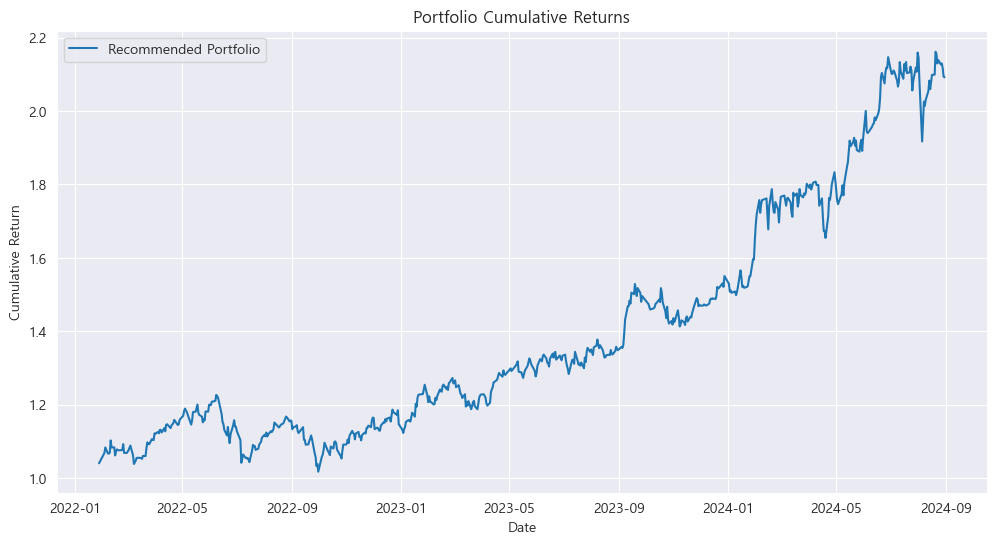

In [23]:
# 추천 포트폴리오의 일일 수익률 계산
portfolio_returns = (returns * recommended_portfolio['weight']).sum(axis=1)

# 누적 수익률 계산
cumulative_returns = (1 + portfolio_returns).cumprod()

# 결과 시각화
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns, label='Recommended Portfolio')
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


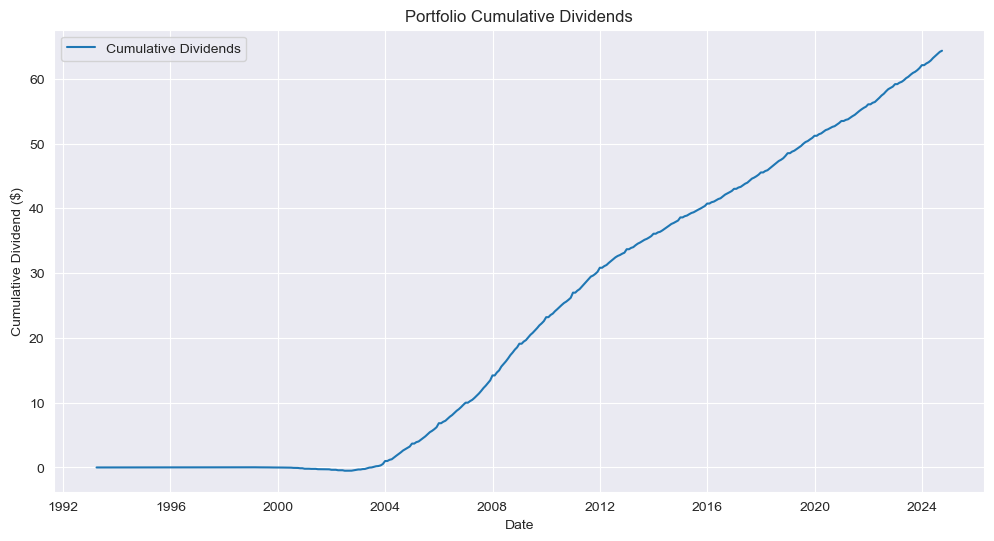

In [17]:
# **배당 데이터 수집 및 포트폴리오 배당 시각화 추가**

# 배당 데이터 수집
dividend_data = pd.DataFrame()
for asset in asset_list:
    dividends = yf.Ticker(asset).dividends
    dividends = dividends.resample('M').sum()  # 월별 배당금 합산
    dividend_data[asset] = dividends

# 결측치 처리
dividend_data = dividend_data.fillna(0)

# 포트폴리오 배당금 계산
portfolio_dividends = dividend_data * recommended_portfolio['weight']
portfolio_dividends['Total_Dividend'] = portfolio_dividends.sum(axis=1)

# 누적 배당금 계산
cumulative_dividends = portfolio_dividends['Total_Dividend'].cumsum()

# 배당금 시각화
plt.figure(figsize=(12,6))
plt.plot(cumulative_dividends, label='Cumulative Dividends')
plt.title('Portfolio Cumulative Dividends')
plt.xlabel('Date')
plt.ylabel('Cumulative Dividend ($)')
plt.legend()
plt.show()

In [18]:
# 배당 데이터 수집 및 가중합 계산
dividend_data = pd.DataFrame()
for asset in asset_list:
    # 배당금 데이터 수집
    dividends = yf.Ticker(asset).dividends
    dividends = dividends.resample('M').sum()  # 월별 배당금 합산
    dividend_data[asset] = dividends

# 결측치 처리
dividend_data = dividend_data.fillna(0)

# 포트폴리오 배당금 계산
portfolio_dividends = dividend_data * recommended_portfolio['weight']
portfolio_dividends['Total_Dividend'] = portfolio_dividends.sum(axis=1)

# 월별 배당금 데이터프레임 생성
monthly_dividends = portfolio_dividends['Total_Dividend'].dropna()


In [20]:
monthly_dividends  

Date
1993-03-31 00:00:00-05:00    0.000718
1993-04-30 00:00:00-04:00    0.000000
1993-05-31 00:00:00-04:00    0.000000
1993-06-30 00:00:00-04:00    0.001072
1993-07-31 00:00:00-04:00    0.000000
                               ...   
2024-05-31 00:00:00-04:00    0.384476
2024-06-30 00:00:00-04:00    0.309982
2024-07-31 00:00:00-04:00    0.339209
2024-08-31 00:00:00-04:00    0.297673
2024-09-30 00:00:00-04:00    0.177909
Freq: M, Name: Total_Dividend, Length: 379, dtype: float64

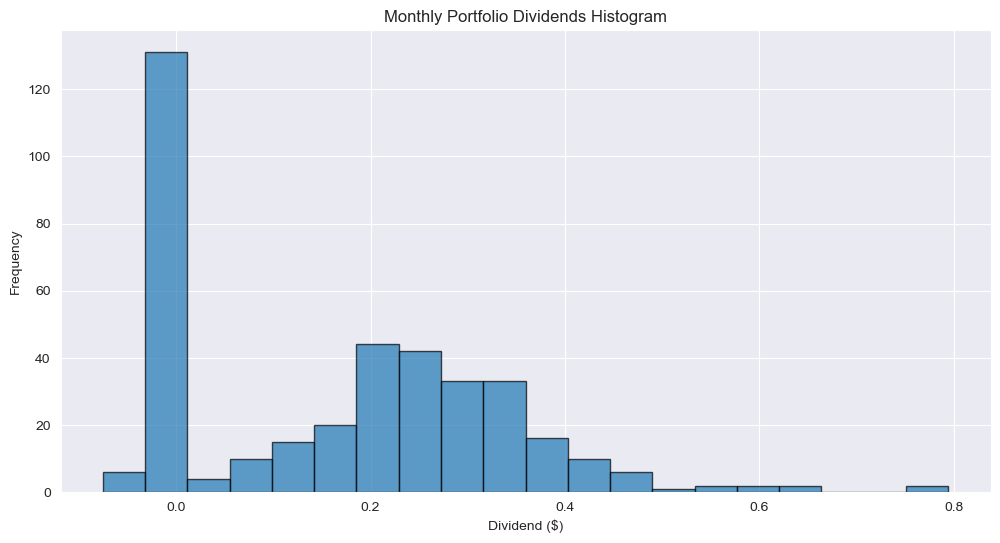

In [19]:
# 월별 배당 히스토그램 시각화
plt.figure(figsize=(12,6))
plt.hist(monthly_dividends, bins=20, edgecolor='k', alpha=0.7)
plt.title('Monthly Portfolio Dividends Histogram')
plt.xlabel('Dividend ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Portfolio Volatility (Annualized): 6.25%
Maximum Drawdown: -22.37%
Value at Risk (95%): -0.59%


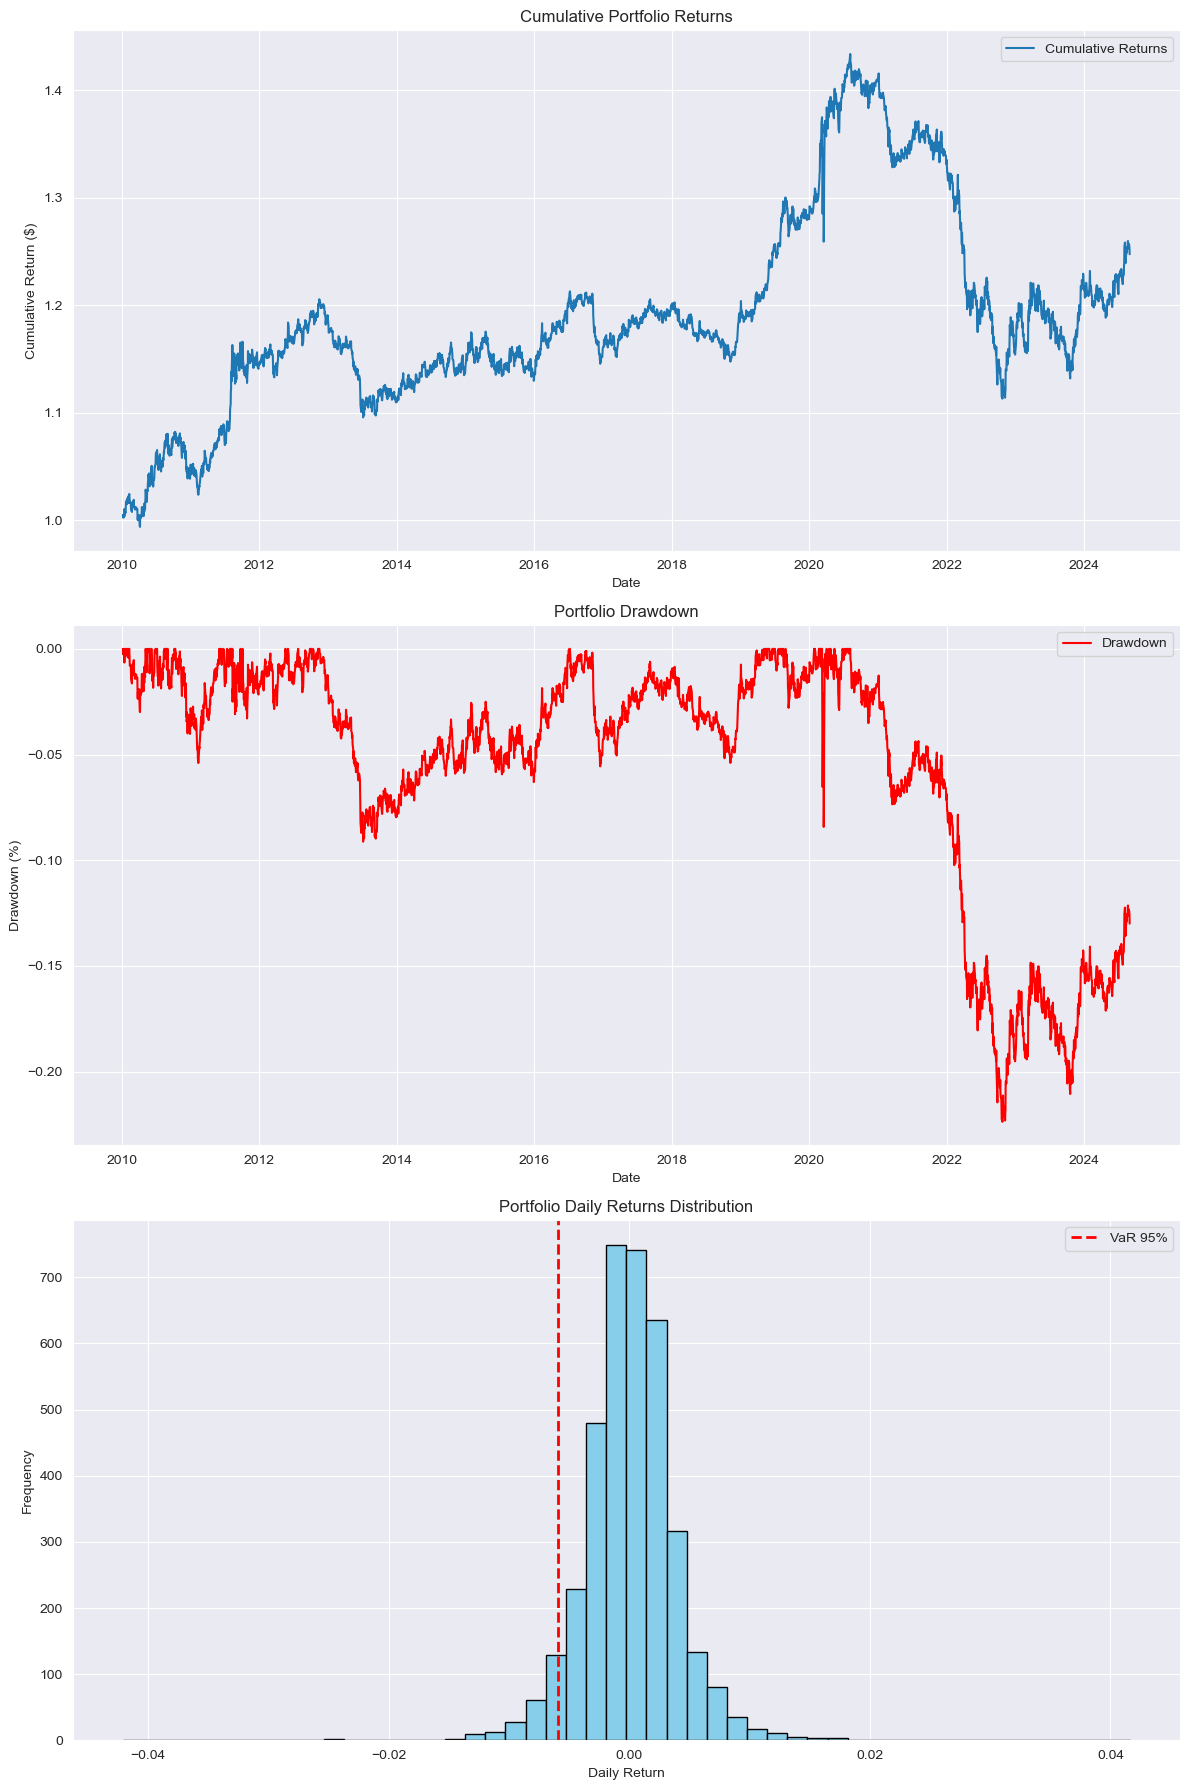

In [22]:
import matplotlib.dates as mdates

# 포트폴리오의 일간 수익률 계산
portfolio_daily_returns = (returns * recommended_portfolio['weight']).sum(axis=1)

# 누적 수익률 계산
cumulative_portfolio_returns = (1 + portfolio_daily_returns).cumprod()

# 변동성 계산 (일간 수익률의 표준편차)
portfolio_volatility = portfolio_daily_returns.std() * np.sqrt(252)  # 연간 변동성

# 최대 낙폭 계산
rolling_max = cumulative_portfolio_returns.cummax()
drawdown = (cumulative_portfolio_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Value at Risk (VaR) 계산 (95% 신뢰 수준)
VaR_95 = portfolio_daily_returns.quantile(0.05)

# 리스크 지표 출력
print(f"Portfolio Volatility (Annualized): {portfolio_volatility:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Value at Risk (95%): {VaR_95:.2%}")

# 리스크 지표 시각화
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# 변동성 시각화
ax[0].plot(cumulative_portfolio_returns, label='Cumulative Returns')
ax[0].set_title('Cumulative Portfolio Returns')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Cumulative Return ($)')
ax[0].legend()
ax[0].grid(True)

# 최대 낙폭 시각화
ax[1].plot(drawdown, color='red', label='Drawdown')
ax[1].set_title('Portfolio Drawdown')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Drawdown (%)')
ax[1].legend()
ax[1].grid(True)

# VaR 시각화
ax[2].hist(portfolio_daily_returns, bins=50, color='skyblue', edgecolor='k')
ax[2].axvline(VaR_95, color='red', linestyle='dashed', linewidth=2, label='VaR 95%')
ax[2].set_title('Portfolio Daily Returns Distribution')
ax[2].set_xlabel('Daily Return')
ax[2].set_ylabel('Frequency')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()


In [23]:
# 리스크 기준 설정
max_allowed_volatility = 0.15  # 연간 변동성 15%
max_allowed_drawdown = -0.20   # 최대 낙폭 20%
VaR_threshold = -0.05          # VaR 95% -5%

# 리스크 지표 확인
if (portfolio_volatility > max_allowed_volatility) or (max_drawdown < max_allowed_drawdown):
    print("리스크 기준 초과: 포트폴리오 조정 필요")
    # 안정적인 자산 비중 증가, 위험 자산 비중 감소
    # 예시: 위험 자산의 가중치를 10% 감소하고, 안정 자산의 가중치를 10% 증가
    # 실제로는 더 정교한 조정이 필요합니다.
    risk_assets = ['SPY', 'XLV', 'IYR']  # 예시로 위험 자산 선정
    safe_assets = ['AGG', 'GLD', 'XLU', 'TLT', 'TIP', 'BND', 'LQD']  # 안전 자산

    # 위험 자산 가중치 감소
    for asset in risk_assets:
        recommended_portfolio.loc[asset, 'weight'] *= 0.90

    # 안전 자산 가중치 증가
    for asset in safe_assets:
        recommended_portfolio.loc[asset, 'weight'] *= 1.10

    # 가중치 재정규화
    recommended_portfolio['weight'] = recommended_portfolio['weight'] / recommended_portfolio['weight'].sum()

    print("포트폴리오 가중치 조정 완료:")
    print(recommended_portfolio.sort_values('weight', ascending=False))
else:
    print("리스크 기준 내: 포트폴리오 유지")


리스크 기준 초과: 포트폴리오 조정 필요
포트폴리오 가중치 조정 완료:
        predicted_return  volatility    weight
Ticker                                        
AGG            -0.023593    0.002988  0.417353
BND            -0.020415    0.003050  0.353765
TIP            -0.012058    0.003675  0.173387
LQD            -0.010234    0.004873  0.110996
GLD            -0.007999    0.009765  0.043292
TLT            -0.007165    0.009647  0.039249
SPY            -0.000675    0.010796  0.002704
XLV             0.002075    0.010195 -0.008800
XLU             0.010948    0.011101 -0.052119
IYR             0.023532    0.012746 -0.079829


C:\Users\rkddk\AppData\Local\Temp\ipykernel_32492\3604435448.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_portfolio['weight'] = recommended_portfolio['weight'] / recommended_portfolio['weight'].sum()
